### Question 1: Select 10 wines to push in order to increase sales

In [1]:
import numpy as np
import pandas as pd

selection_sales_df = pd.read_csv('CSVs/query_01.csv')

# Calculation of the Popularity Score per wine
selection_sales_df['popularity_score'] = selection_sales_df['vintage_ratings_average'] * np.log(selection_sales_df['vintage_rating_count'])

# Calculation of the Value for Money
selection_sales_df['value_for_money'] = selection_sales_df['vintage_ratings_average'] / selection_sales_df['liter_price_euros'] * 500

# Establishing a ranking by Popularity Score
selection_sales_df['popularity_rank'] = selection_sales_df['popularity_score'].rank(ascending=False, method='min')

# Establishing a ranking by Value for Money
selection_sales_df['value_rank'] = selection_sales_df['value_for_money'].rank(ascending=False, method='min')

# Average rank of Popularity Score and Value for Money
selection_sales_df['combined_rank'] = (selection_sales_df['popularity_rank'] + selection_sales_df['value_rank']) / 2

# Dropping the duplicated based on wine_name
selection_sales_df = selection_sales_df.sort_values('combined_rank').drop_duplicates(subset='wine_name')

# Sorting by combined rank within each country and selecting the top three wines from each country
top_wines_by_country = selection_sales_df.sort_values('combined_rank').groupby('country').head(3).reset_index(drop=True)

# Sorting the selected wines by the combined rank and picking the top 10
top_10_sales = top_wines_by_country.sort_values('combined_rank').head(10)

# Displaying the selected wines
top_10_sales = top_10_sales[['vintage_name', 'country', 'popularity_score', 'value_for_money', 'combined_rank', 'popularity_rank', 'value_rank', 'vintage_ratings_average', 'vintage_rating_count', 'liter_price_euros']]
print(top_10_sales[['vintage_name', 'country', 'popularity_score', 'value_for_money', 'combined_rank', 'popularity_rank', 'value_rank', 'vintage_ratings_average', 'vintage_rating_count', 'liter_price_euros']])


                                        vintage_name     country  \
0  San Marzano 60 Sessantanni Old Vines Primitivo...      Italie   
1         Tenuta Ulisse Limited Edition 10 Vendemmie      Italie   
2          Matarromera Ribera del Duero Reserva 2018     Espagne   
3                                 Rutini Malbec 2019   Argentine   
4                           Gitana Lupi Rezerva 2016    Moldavie   
5                     Pago de Carraovejas Tinto 2020     Espagne   
6    Zenato Amarone della Valpolicella Classico 2017      Italie   
7          Laurent-Perrier Brut Cuvée Champagne Rosé      France   
8  Buena Vista Chateau Buena Vista Cabernet Sauvi...  États-Unis   
9                                   Pintia Toro 2017     Espagne   

   popularity_score  value_for_money  combined_rank  popularity_rank  \
0         43.858119        52.775606           19.0              7.0   
1         41.193393        49.342105           28.5             19.0   
2         38.013408        41.30162

c:\Users\cngue\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Question 1: Plotting the rankings

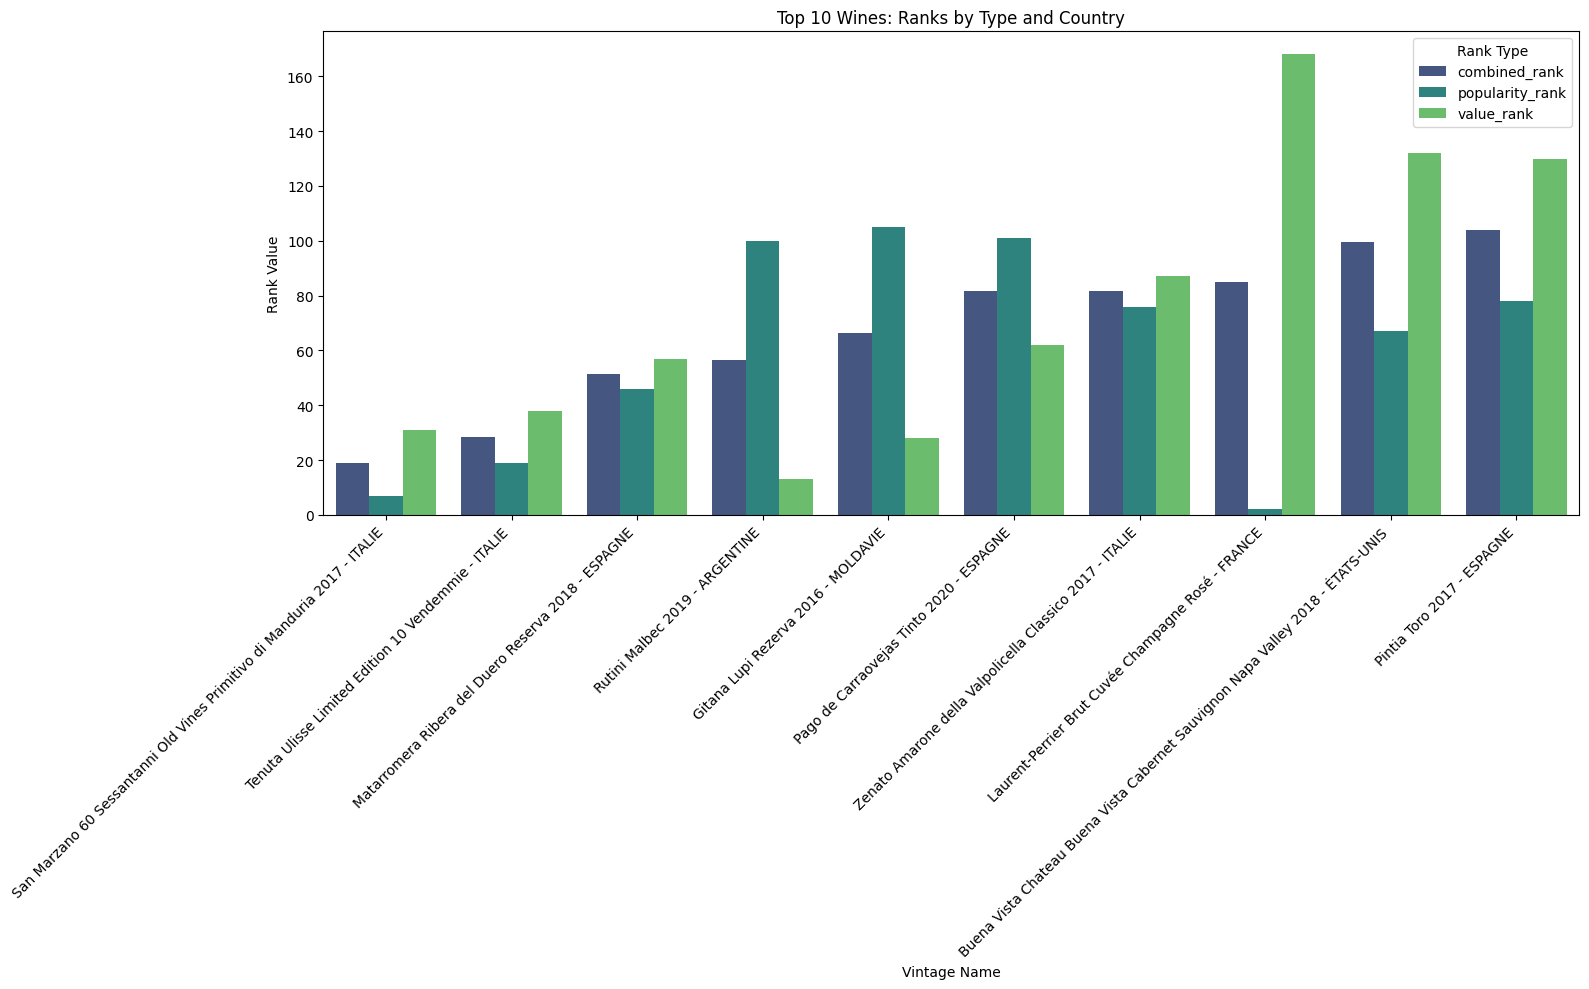

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring the DataFrame is sorted by 'combined_rank' before melting
top_10_sales_sorted = top_10_sales.sort_values(by='combined_rank', ascending=True)

# Creating a new column combining wine name and country
top_10_sales_sorted["name_and_country"] = top_10_sales_sorted.apply(
    lambda row: f"{row['vintage_name']} - {row['country'].upper()}", axis=1
)

# Melting the DataFrame for easier plotting
top_10_melted = top_10_sales_sorted.melt(id_vars=['name_and_country'], value_vars=['combined_rank', 'popularity_rank', 'value_rank'], var_name='rank_type', value_name='rank_value')

plt.figure(figsize=(16, 10))

# Creating the bar plot
sns.barplot(data=top_10_melted, x='name_and_country', y='rank_value', hue='rank_type', palette='viridis', dodge=True, order=top_10_sales_sorted['name_and_country'])

# Customizing the plot
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Wines: Ranks by Type and Country')
plt.xlabel('Vintage Name')
plt.ylabel('Rank Value')
plt.legend(title='Rank Type')

plt.tight_layout()
plt.show()



### Question 1: Interactive bar chart

In [3]:
import plotly.express as px

# Ensuring the DataFrame is sorted by 'combined_rank' before melting
top_10_sales_sorted = top_10_sales.sort_values(by='combined_rank', ascending=True)

# Creating a new column combining wine name and country
top_10_sales_sorted["name_and_country"] = top_10_sales_sorted.apply(lambda row: f"{row['vintage_name']} - {row['country'].upper()}", axis=1)

# Melting the DataFrame for easier plotting
top_10_melted = top_10_sales_sorted.melt(id_vars=['name_and_country', 'vintage_ratings_average', 'vintage_rating_count', 'liter_price_euros'], value_vars=['combined_rank', 'popularity_rank', 'value_rank'], var_name='ranking type', value_name='rank_value')

# Creating a bar plot with interactive information display
fig = px.bar(top_10_melted, 
             x='name_and_country', 
             y='rank_value', 
             color='ranking type', 
             hover_data=['vintage_ratings_average', 'vintage_rating_count', 'liter_price_euros'], 
             title='Top 10 Wines: Ranks by Type and Country',
             height=1000,
             color_discrete_sequence=px.colors.sequential.Cividis)

# Customizing the layout
fig.update_layout(
    title={'text': 'Top 10 Wines: Ranks by Type and Country', 'font': {'size': 28}}, 
    xaxis_title={'text': 'Vintage Wine Name', 'font': {'size': 20, 'family': 'Arial', 'color': 'black'}},  
    yaxis_title={'text': 'Ranking', 'font': {'size': 20, 'family': 'Arial', 'color': 'black'}},  
    xaxis_tickangle=-45,
    barmode='group')

fig.show()

### Exploratory analysis about countries : Bubble chart for countries information (wine count, average rating, median price)

In [4]:
selection_sales_df = selection_sales_df[selection_sales_df['country'] != 'Israël']

# Aggregating data per country
aggregated_data = selection_sales_df.groupby('country').agg(median_price=('liter_price_euros', 'median'),avg_rating=('vintage_ratings_average', 'mean'),rating_count=('vintage_rating_count', 'count')).reset_index()

# Bubble chart parameters
fig = px.scatter(
    aggregated_data,
    x='median_price',
    y='avg_rating',
    size='rating_count',
    color='country',
    hover_name='country',
    size_max=200,
    height=600
)

# Adjusting the titles and font sizes
fig.update_layout(
    title={
        'text': 'Bubble Chart: Wine Prices, Ratings, and Countries',
        'font': {'size': 24}, 
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title={
        'text': 'Average Price (Euros)',
        'font': {'size': 18} 
    },
    yaxis_title={
        'text': 'Average Rating (scale from 0 to 5)',
        'font': {'size': 18} 
    }
)

fig.show()
